## Importing the Libraries

In [44]:
import numpy as np
import pandas as pd

import nltk

# For visualizations (EDA)
import seaborn as sb
sb.set(font_scale=2) # set the default Seaborn style for graphics
import matplotlib.pyplot as plt # we only need pyplot
from collections import Counter
from wordcloud import WordCloud


## Importing both Original and Cleaned Datasets

In [45]:
dataOriginal = data4 = pd.read_csv('completeSpamAssassin.csv')
dataClean = pd.read_csv('cleaned_email_data.csv')
dataOriginal.dropna(inplace=True)
dataOriginal.drop(['Unnamed: 0'],axis=1, inplace=True)
dataClean.dropna(inplace=True)

Creating 3 new variables for data exploration: noChar (# of characters), noWords (# of words), and noSent (# of sentences)

In [46]:
dataOriginal['no_char'] = dataOriginal['Body'].apply(len)
dataOriginal['no_words'] = dataOriginal['Body'].apply(lambda x:len(nltk.word_tokenize(x)))
dataOriginal['no_sent'] = dataOriginal['Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [47]:
dataOriginal.head()

,Body,Label,no_char,no_words,no_sent
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1,1111,191,12
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,753,139,5
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1,610,113,4
3,##############################################...,1,2863,690,35
4,I thought you might like these:\n1) Slim Down ...,1,641,108,4


### Seeing the distribution of Spam vs Ham (Real) Emails

Text(0, 0.5, 'Frequency')

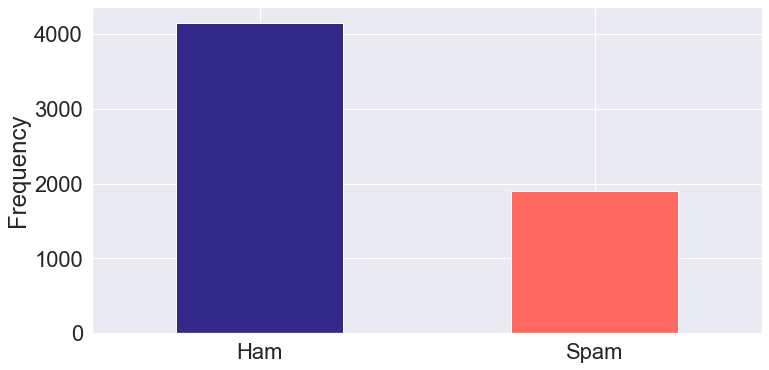

In [48]:
plt.figure(figsize=(12,6))
dataOriginal['Label'] = dataOriginal['Label'].map({0: "Ham", 1: "Spam"})
dataOriginal['Label'].value_counts().plot.bar(rot=0, color=['#322989', '#ff6961']).set_ylabel("Frequency")

In [49]:
dataOriginal[dataOriginal['Label'] == 'Ham']['no_words'].describe()

count     4150.00000
mean       322.90000
std        757.92311
min          1.00000
25%         85.00000
50%        176.00000
75%        318.00000
max      18564.00000
Name: no_words, dtype: float64

Seeing the distribution of the number of words per email in both Spam (Red) and Ham (Blue) emails

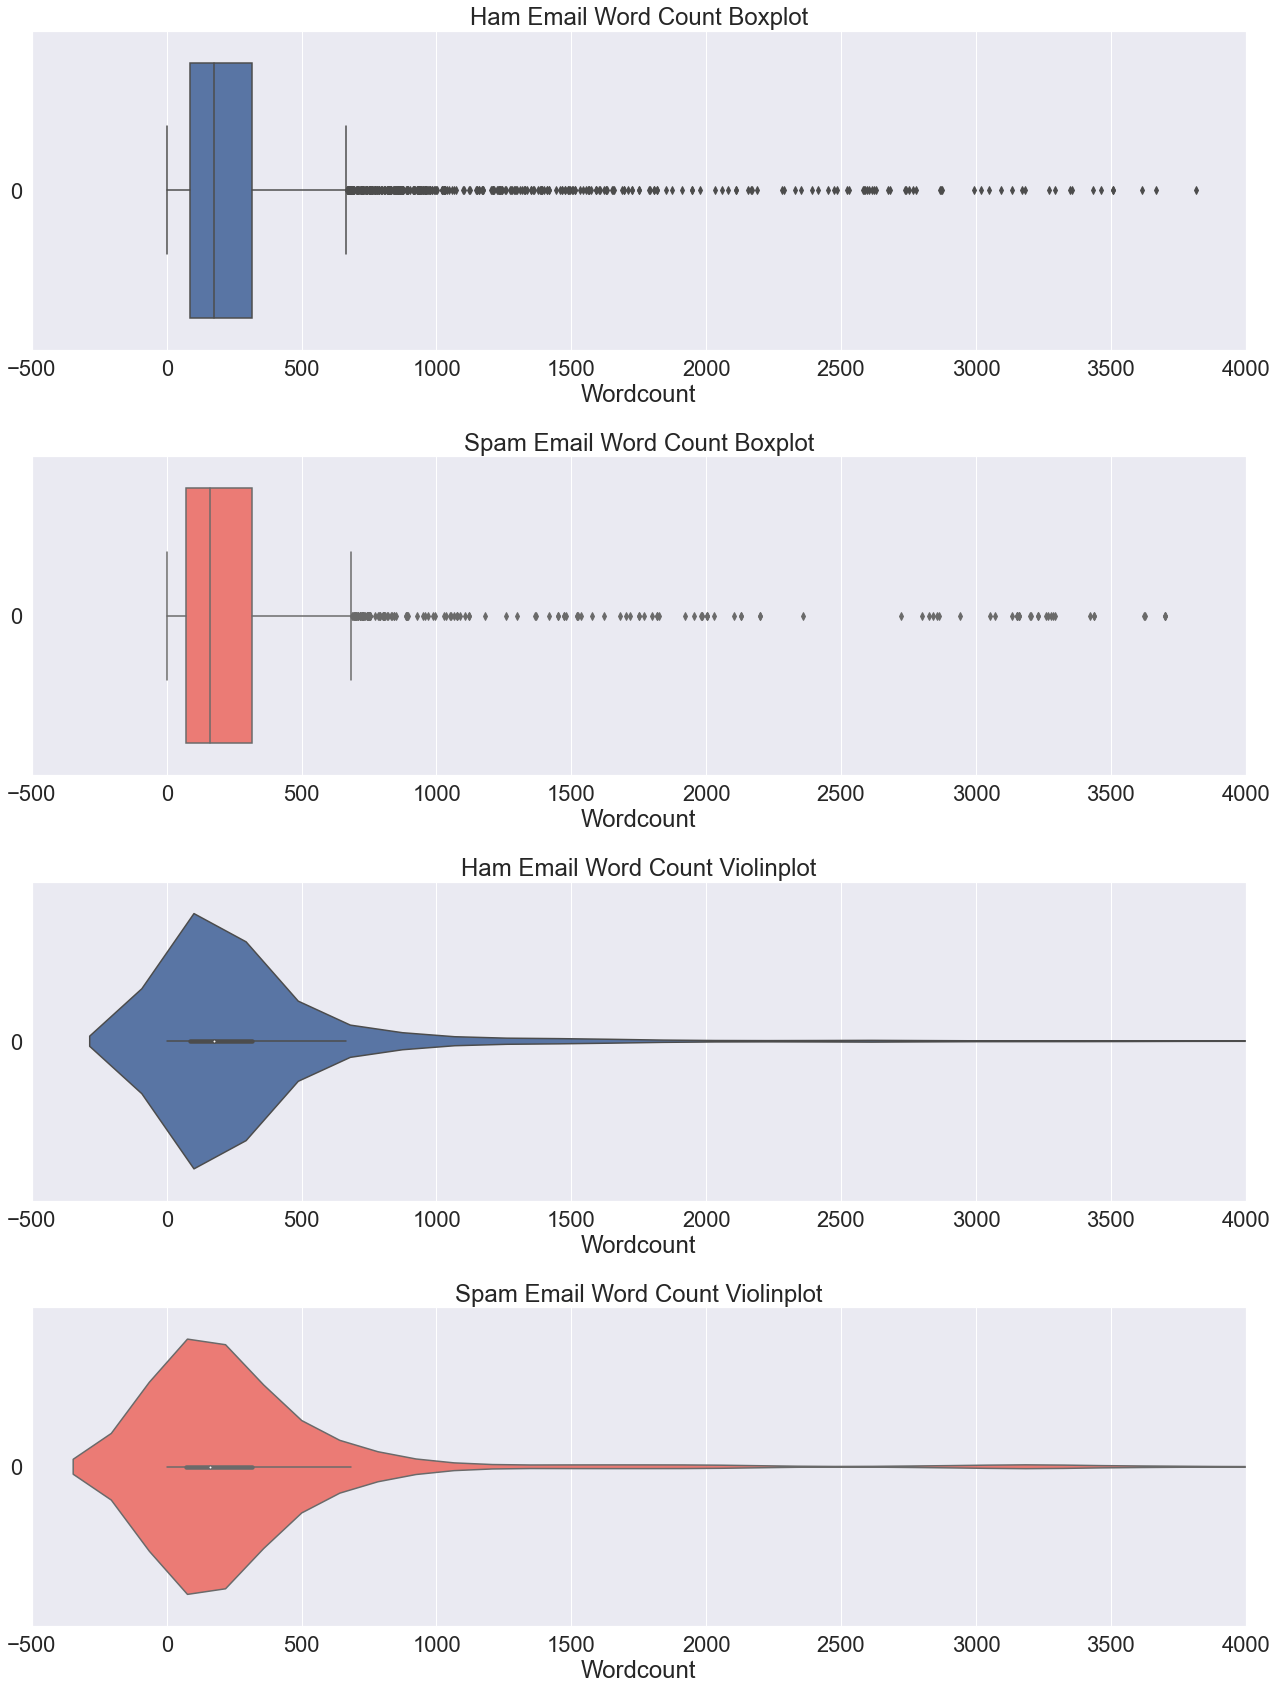

In [50]:
f, axes = plt.subplots(4, 1, figsize=(18, 24))
sb.boxplot(dataOriginal[dataOriginal['Label'] == 'Ham']['no_words'].values, orient = "h", ax=axes[0]).set(
    title="Ham Email Word Count Boxplot", 
    xlabel='Wordcount')
sb.boxplot(dataOriginal[dataOriginal['Label'] == 'Spam']['no_words'], orient = "h", ax=axes[1], color='#ff6961').set(
    title="Spam Email Word Count Boxplot", 
    xlabel='Wordcount')
sb.violinplot(dataOriginal[dataOriginal['Label'] == 'Ham']['no_words'].values, orient = "h", ax = axes[2]).set(
    title="Ham Email Word Count Violinplot", 
    xlabel='Wordcount')
sb.violinplot(dataOriginal[dataOriginal['Label'] == 'Spam']['no_words'], orient = "h", ax = axes[3], color='#ff6961').set(
    title="Spam Email Word Count Violinplot", 
    xlabel='Wordcount')
plt.tight_layout()
plt.xlim(-500, 4000)
plt.setp(axes, xlim=(-500, 4000))
plt.show()

Seeing the frequency of Ham vs Spam emails in the dataset plotted over the number of words in the body of the email.

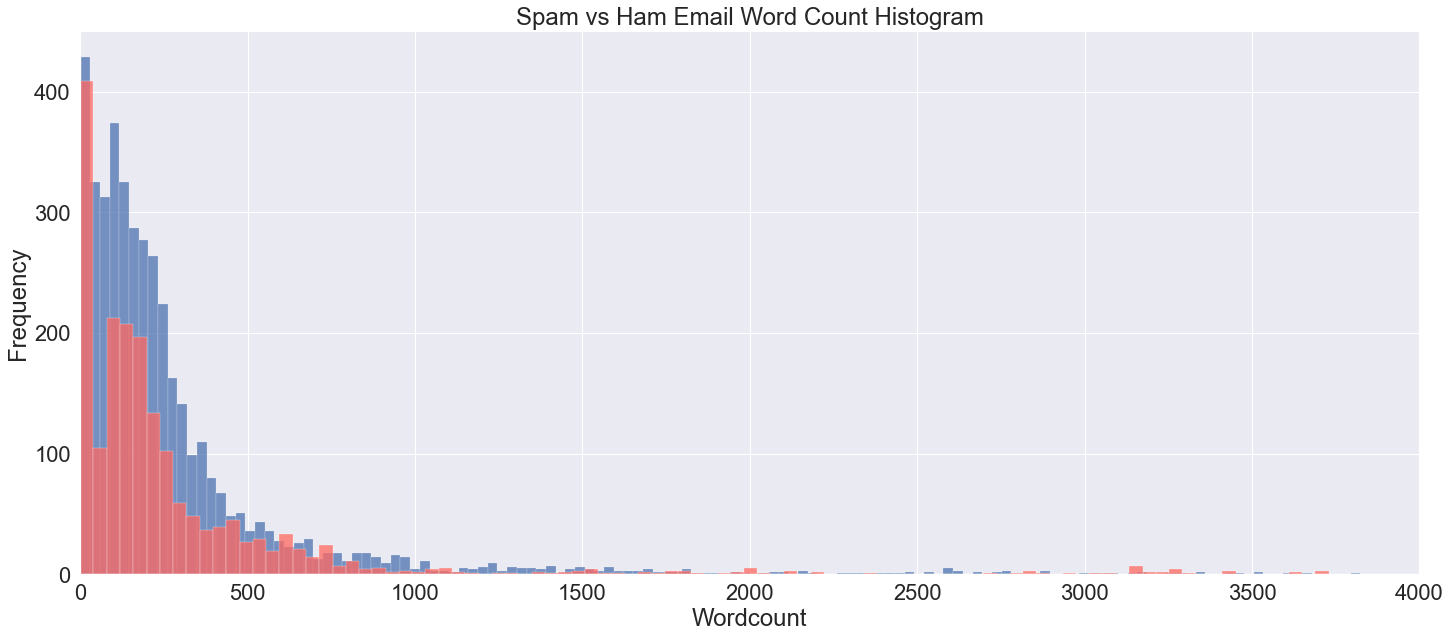

In [51]:
f, axes = plt.subplots(1, 1, figsize=(24, 10))
sb.histplot(dataOriginal[dataOriginal['Label'] == 'Ham']['no_words']).set(
    title="Spam vs Ham Email Word Count Histogram", 
    ylabel='Frequency',
    xlabel='Wordcount')
sb.histplot(dataOriginal[dataOriginal['Label'] == 'Spam']['no_words'], color='#ff6961')
plt.xlim(-500, 4000)
plt.setp(axes, xlim=(0, 4000))
plt.show()

Plotting each of the 3 variables against each other

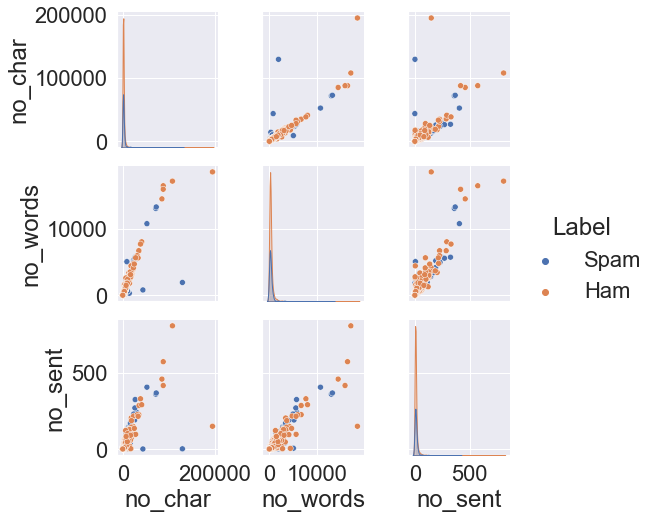

<Figure size 1728x432 with 0 Axes>

In [52]:
sb.pairplot(dataOriginal, hue='Label')
plt.figure(figsize=(24,6))
plt.show()

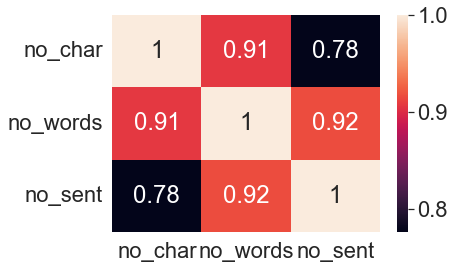

In [53]:
sb.heatmap(dataOriginal.corr(), annot=True)
plt.show()

## EDA using cleaned dataset

#### Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

Setting the specifications of word cloud image

In [54]:
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')

Creating word cloud of spam emails

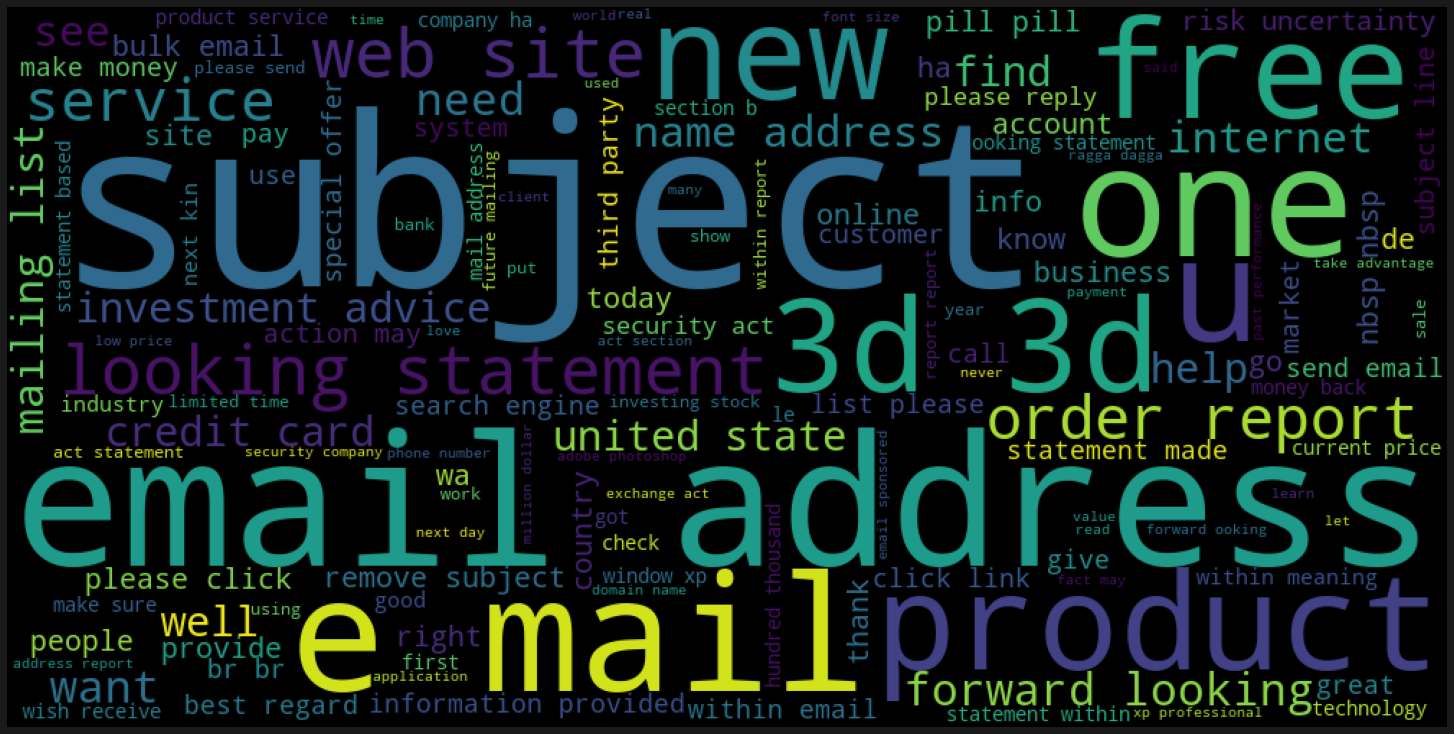

In [55]:
spam_wc = wc.generate(dataClean[dataClean['Label'] == 1]['Body'].str.cat(sep=' '))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(spam_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Creating word cloud of ham emails

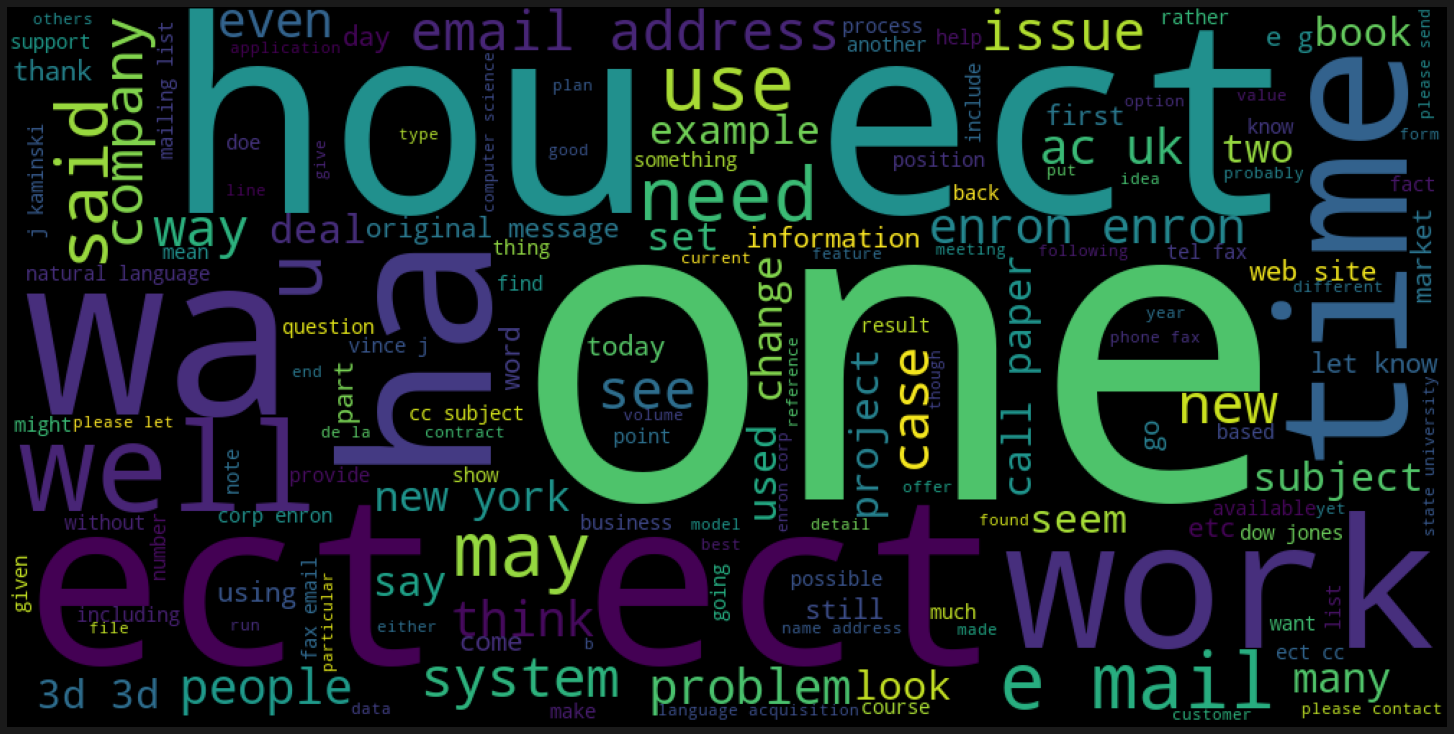

In [56]:
ham_wc = wc.generate(dataClean[dataClean['Label'] == 0]['Body'].str.cat(sep=' '))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(ham_wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Now to create a corpus list of all the words processed in the above spam emails 

In [57]:
spam_corpus = []
for mail in dataClean[dataClean['Label'] == 1]['Body'].tolist():
    for word in mail.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)

1108588

##### Plotting the top 50 most frequently used words in Spam emails

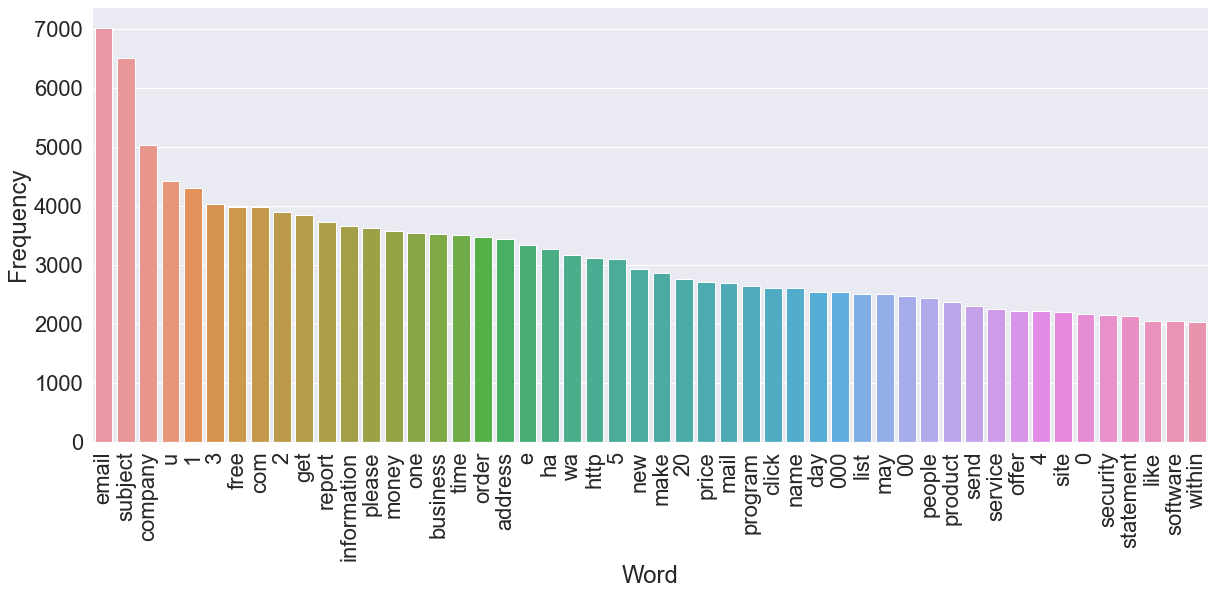

In [59]:
plt.figure(figsize=(20,8))
sb.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

Now, doing the same process as above for Ham emails

In [60]:
ham_corpus = []
for mail in dataClean[dataClean['Label'] == 0]['Body'].tolist():
    for word in mail.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

3728735

##### Top 50 most frequently used words in Ham emails

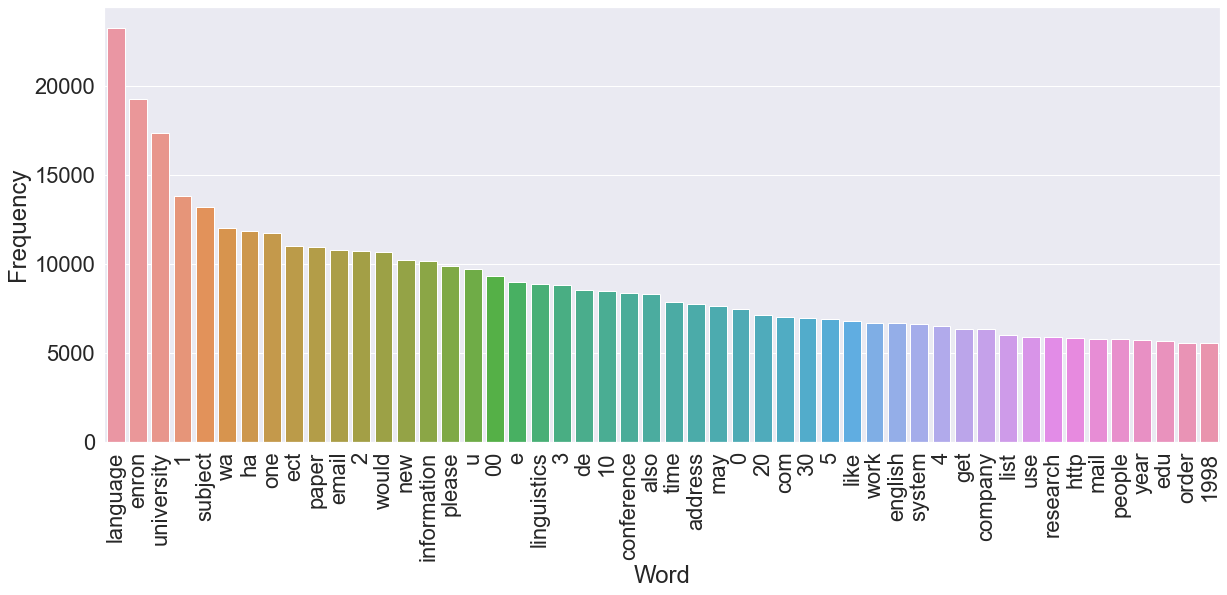

In [62]:
plt.figure(figsize=(20,8))
sb.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()